# Estatística Prática para Cientistas de Dados
## Peter Bruce & Andrew Bruce

### Capítulo 1: Análise Exploratória de Dados


In [1]:
# Importações

import numpy as np
import pandas as pd
from scipy.stats import trim_mean, median_abs_deviation, iqr
import matplotlib.pyplot as plt


In [2]:
# Funções Auxiliares

def weighted_median(values, weights) -> float:
    indeces = np.argsort(values)
    values = np.sort(values)
    weights = weights[indeces]
    
    cumsum_weights = np.cumsum(weights)
    central_value = max(cumsum_weights)/2
    
    if np.any(cumsum_weights == central_value):
        median = values[cumsum_weights == central_value]
    else:
        lower_value_index = sum(cumsum_weights < central_value) - 1
        top_value_index = lower_value_index + 1
        
        median = (values[lower_value_index] + values[top_value_index])/2
    
    return median

def mean_abs_deviation(values) -> float:
    mean = np.mean(values)
    deviations = values - mean
    abs_deviations = np.absolute(deviations)
    
    result = np.mean(abs_deviations)
    
    return result


#### Estimativas de Localização


In [3]:
# Exemplo 1

# Média

conjunto_de_numeros = np.array([3, 5, 1, 2])
media = np.mean(conjunto_de_numeros)
print(f'A média é {media}')


A média é 2.75


In [4]:
# Exemplo 2

# Conjunto de Dados

state = pd.read_csv('../database/state.csv')
display(state.head(8))

print('\n- Medidas de Localidade para a População\n')
print(f'A média é {round(state.Population.mean())}')
print(f'A média aparada (trim mean) é {round(trim_mean(state.Population, proportiontocut=0.1))}')
print(f'A mediana é {round(state.Population.median())}')

print('\n- Medidas de Localidade para a Taxa Média de Homicídios\n')
print(f"A média ponderada é {np.average(state['Murder.Rate'], weights=state.Population)}")
print(f"A mediana ponderada é {weighted_median(state['Murder.Rate'], state.Population)}")


,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE



- Medidas de Localidade para a População

A média é 6162876
A média aparada (trim mean) é 4783697
A mediana é 4436370

- Medidas de Localidade para a Taxa Média de Homicídios

A média ponderada é 4.445833981123393
A mediana ponderada é 4.4


#### Estimativas de Variabilidade

In [5]:
# Exemplo 3

conjunto_de_dados = np.array([1, 4, 4])
media = round(np.mean(conjunto_de_dados))
desvios = conjunto_de_dados - media

print(f'Os desvios da média do conjunto de dados são {desvios}')
print(f'Os valores absolutos dos desvios são {np.absolute(desvios)}')
print(f'O desvio absoluto médio (ou norma de Manhattan) é {round(mean_abs_deviation(conjunto_de_dados), 2)}')


Os desvios da média do conjunto de dados são [-2  1  1]
Os valores absolutos dos desvios são [2 1 1]
O desvio absoluto médio (ou norma de Manhattan) é 1.33


In [6]:
# Exemplo 4

display(state.head())

print(f'\n- Medidas de Dispersão para a População\n')
print(f'O desvio padrão é {round(state.Population.std())}')
print(f'A amplitude interquartis (IQR) é {round(iqr(state.Population))}')
print(f'O desvio absoluto mediano é {round(median_abs_deviation(state.Population))}')


,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA



- Medidas de Dispersão para a População

O desvio padrão é 6848235
A amplitude interquartis (IQR) é 4847308
O desvio absoluto mediano é 2596702


#### Explorando a Distribuição de Dados

Os quantis da Taxa de Homicídio são:
[[0.05  0.25  0.5   0.75  0.95 ]
 [1.6   2.425 4.    5.55  6.51 ]]

O Boxplot para a População é:


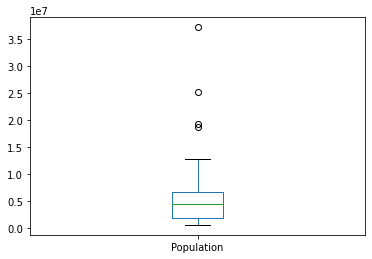

In [7]:
# Exemplo 5

references = np.array([0.05, 0.25, 0.5, 0.75, 0.95])
quantis = np.quantile(state['Murder.Rate'], references)

print(f'Os quantis da Taxa de Homicídio são:\n{np.array([references, quantis])}\n')

print('O Boxplot para a População é:')
state.boxplot(column='Population', grid=False);


#### Tabela de Frequências e Histogramas

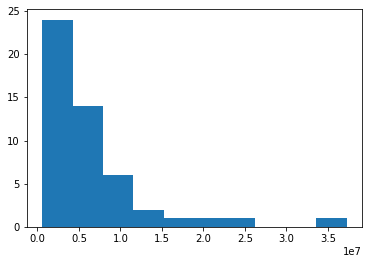

In [8]:
# Exemplo 6

state.Population.hist()
plt.grid()

#### Estimativas de Densidade

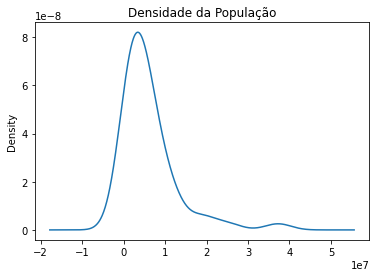

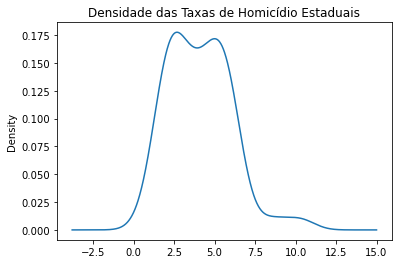

In [18]:
# Exemplo 7

plt.figure()
state.Population.plot.density();
plt.title('Densidade da População');

plt.figure()
state['Murder.Rate'].plot.density();
plt.title('Densidade das Taxas de Homicídio Estaduais');


#### Explorando Dados Binários e Categóricos

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


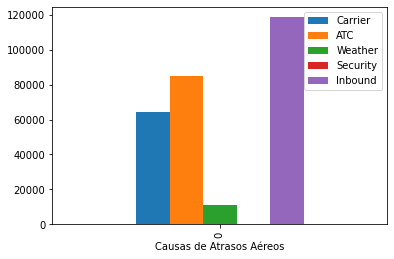

In [27]:
# Exemplo 8

dfw = pd.read_csv('../database/dfw_airline.csv')
display(dfw)

dfw.plot.bar();
plt.xlabel('Causas de Atrasos Aéreos');

#### Valor Esperado

In [31]:
# Exemplo 9

"""
Um vendedor de uma nova tecnologia de nuvem, por exemplo, oferece dois níveis de serviços, um que custa R$ 300/mês e outro que
custa R$ 50/mês.

O vendedor oferecee webinars gratuitos para gerar leads, e a empresa percebe que 5% dos participantes assinarão o serviço de
R$ 300, 15% o de R$ 50, e 80% não assinarão.
"""

EV = 0.05*300 + 0.15*50 + 0.8*0
print(f'O valor esperado de um participante de webinar é R$ {EV} por mês')

O valor esperado de um participante de webnar é R$ 22.5 por mês


#### Correlação

#### Explorando Duas ou Mais Variáveis

#### *Observações*

Utilização das medidas de localização:

- Média: Utilizada para dados numéricos sem outliers;
- Mediana: Utilizada para dados numéricos com outliers;
- Moda: Utilizada para dados categóricos.
